# Notebook 3: Machine Learning Model Construction

## Objectives:

### `1. Perform final preprocessing steps like Data Scaling and Feature Engineering`
### `2. Construct model using all appropriate Classification algorithms`
### `3. Train and validate all the models.`
### `4. Test and compare the models over various metrics`
### `5. Perform Hyperparameter tuning to optimize the model performance.`


In [46]:
# Importation of libraries

# For mathematical computations
import numpy as np

# For data analysis 
import pandas as pd

# For data visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# For data scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

# For feature engineering
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


# For ML model construction (training and testing)
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import random  


# For exporting the model
import pickle

In [47]:
# Dataset importation
df = pd.read_csv('Telco_customer_churn-3.csv')
df.head()

,Unnamed: 0,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,0,1,0,0,0,0,1,0,0,2,...,0,0,0,1,3,53.85,108.15,1,86,3239
1,1,0,0,0,1,0,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,67,2701
2,2,0,0,0,1,1,1,2,1,0,...,2,2,0,1,2,99.65,820.50,1,86,5372
3,3,0,0,1,1,5,1,2,1,0,...,2,2,0,1,2,104.80,3046.05,1,84,5003
4,4,1,0,0,1,9,1,2,1,0,...,2,2,0,1,0,103.70,5036.30,1,89,5340


In [48]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   int64  
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   int64  
 3   Dependents         7043 non-null   int64  
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   int64  
 6   Multiple Lines     7043 non-null   int64  
 7   Internet Service   7043 non-null   int64  
 8   Online Security    7043 non-null   int64  
 9   Online Backup      7043 non-null   int64  
 10  Device Protection  7043 non-null   int64  
 11  Tech Support       7043 non-null   int64  
 12  Streaming TV       7043 non-null   int64  
 13  Streaming Movies   7043 non-null   int64  
 14  Contract           7043 non-null   int64  
 15  Paperless Billing  7043 non-null   int64  
 16  Payment Method     7043 

## Feature engineering

### Scaling down 'Monthly Charges', 'Churn Score' and 'Total Charges' 

In [49]:
df[['Total Charges','Monthly Charges', 'Churn Score' ,'CLTV']] = scaler.fit_transform(df[['Total Charges','Monthly Charges', 'Churn Score','CLTV']])
print(df[['Total Charges','Monthly Charges', 'Churn Score','CLTV']])

      Total Charges  Monthly Charges  Churn Score      CLTV
0          0.012453         0.354229     0.852632  0.274850
1          0.017462         0.521891     0.652632  0.155215
2          0.094475         0.809950     0.852632  0.749166
3          0.350733         0.861194     0.831579  0.667111
4          0.579898         0.850249     0.884211  0.742050
...             ...              ...          ...       ...
7038       0.163435         0.028856     0.421053  0.734490
7039       0.229194         0.662189     0.568421  0.030465
7040       0.847792         0.845274     0.694737  0.790972
7041       0.039892         0.112935     0.568421  0.175673
7042       0.788101         0.869652     0.347368  0.688014

[7043 rows x 4 columns]


In [50]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,0,0,0,0,1,0,0,2,2,...,0,0,0,1,3,0.354229,0.012453,1,0.852632,0.274850
1,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,0.521891,0.017462,1,0.652632,0.155215
2,0,0,0,1,1,1,2,1,0,0,...,2,2,0,1,2,0.809950,0.094475,1,0.852632,0.749166
3,0,0,1,1,5,1,2,1,0,0,...,2,2,0,1,2,0.861194,0.350733,1,0.831579,0.667111
4,1,0,0,1,9,1,2,1,0,2,...,2,2,0,1,0,0.850249,0.579898,1,0.884211,0.742050


### Using 'ExtraExtraTreesClassifier' for analysing feature importances and selection

In [51]:
X = df.drop('Churn Value',axis = 1)
y = df['Churn Value']

In [52]:
# Verifying shape
print(X.shape, y.shape)

(7043, 21) (7043,)


In [53]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [54]:
features = pd.Series(model.feature_importances_,index=X.columns)

<Axes: >

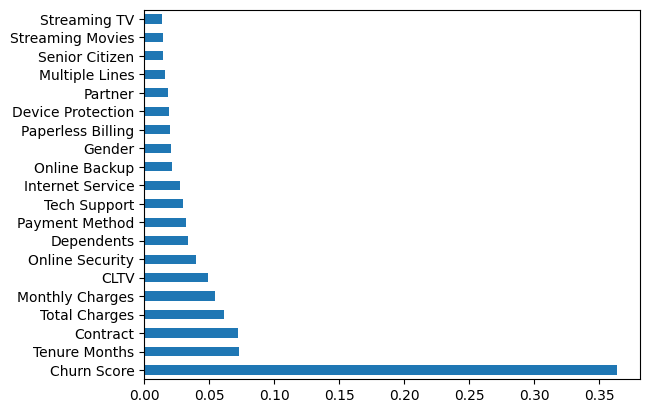

In [55]:
features.nlargest(20).plot(kind='barh')

Selecting the top 6 most important features. (Big drop from 6 to 7, model accuracy has already been tested around different selected features)

In [56]:
X = df[list(features.nlargest(6).index)]
X

,Churn Score,Tenure Months,Contract,Total Charges,Monthly Charges,CLTV
0,0.852632,0,0,0.012453,0.354229,0.274850
1,0.652632,0,0,0.017462,0.521891,0.155215
2,0.852632,1,0,0.094475,0.809950,0.749166
3,0.831579,5,0,0.350733,0.861194,0.667111
4,0.884211,9,0,0.579898,0.850249,0.742050
...,...,...,...,...,...,...
7038,0.421053,14,2,0.163435,0.028856,0.734490
7039,0.568421,4,1,0.229194,0.662189,0.030465
7040,0.694737,14,1,0.847792,0.845274,0.790972
7041,0.568421,2,0,0.039892,0.112935,0.175673


### Experiment: First testing with all classification models

In [57]:
model_svc = SVC()
model_lr = LogisticRegression(max_iter = 1000)
model_dt = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_nbc = GaussianNB()

## Model cross-validation

In [58]:
# using cross validation score to avoid overfitting

scores_svc = cross_val_score(model_svc,X,y,cv = 10)
print('Average score of SVC: ',sum(scores_svc)/10)

scores_lr = cross_val_score(model_lr,X,y,cv = 10)
print('Average score of LR: ', sum(scores_lr)/10)

scores_dtc = cross_val_score(model_dt,X,y,cv = 10)
print('Average score of DTC: ', sum(scores_dtc)/10)

scores_rfc = cross_val_score(model_rfc,X,y,cv = 10)
#78 -> 80+
print('Average score of RFC: ', sum(scores_rfc)/10)

scores_knc = cross_val_score(model_knn,X,y,cv = 10)
print('Average score of KNC:',sum(scores_knc)/10)

scores_nbc = cross_val_score(model_nbc,X,y,cv = 10)
print('Average score of NBC', sum(scores_nbc)/10)

Average score of SVC:  0.8945021357188911
Average score of LR:  0.9094116698903931
Average score of DTC:  0.9031675128949065
Average score of RFC:  0.9237530222437137
Average score of KNC: 0.896773855577047
Average score of NBC 0.8828594455190201


## Testing models on major classification metrics

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a list of models for iteration
models = [
    ("SVC", model_svc),
    ("Logistic Regression", model_lr),
    ("Decision Tree", model_dt),
    ("Random Forest", model_rfc),
    ("K-Nearest Neighbors", model_knn),
    ("Naive Bayes", model_nbc)
]

Code to check top classification metrics over all major models

In [60]:
# Iterate through models and evaluate performance
for name, model in models:

    # Fit and predict the data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Final classification report:")
    print(classification_report(y_test, y_pred))
    print("\n\n")


Model: SVC
Accuracy: 0.89
Precision: 0.81
Recall: 0.73
F1 Score: 0.77
Confusion Matrix:
[[988  60]
 [ 98 263]]
Final classification report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1048
           1       0.81      0.73      0.77       361

    accuracy                           0.89      1409
   macro avg       0.86      0.84      0.85      1409
weighted avg       0.89      0.89      0.89      1409




Model: Logistic Regression
Accuracy: 0.91
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
Confusion Matrix:
[[984  64]
 [ 63 298]]
Final classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1048
           1       0.82      0.83      0.82       361

    accuracy                           0.91      1409
   macro avg       0.88      0.88      0.88      1409
weighted avg       0.91      0.91      0.91      1409




Model: Decision Tree
Accuracy: 0.92
Precisio

<Axes: >

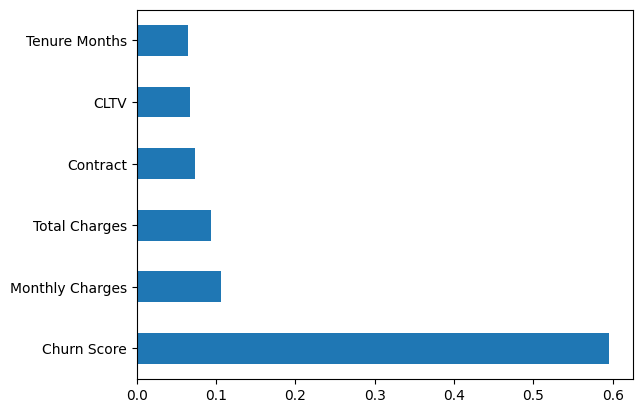

In [61]:
feature_importances = model_rfc.feature_importances_

# Create a Pandas Series for easier analysis and visualization
features = pd.Series(feature_importances, index=X.columns)
features.nlargest(11).plot(kind='barh')

Churn score label specially made to calculate churn is extremely important in churn prediction compared to any other features.

## Visualising results

#### Below is a code snippet to visualise results based off different metrics for each model!

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Creating lists to store model names and their corresponding metric scores
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []  

# Iterate through models and evaluate performance
for name, model in models:
    # Fit the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score
    
    # Append model name and metric scores to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)  



### Creating a grouped bar chart to visualize multiple metrics for each model

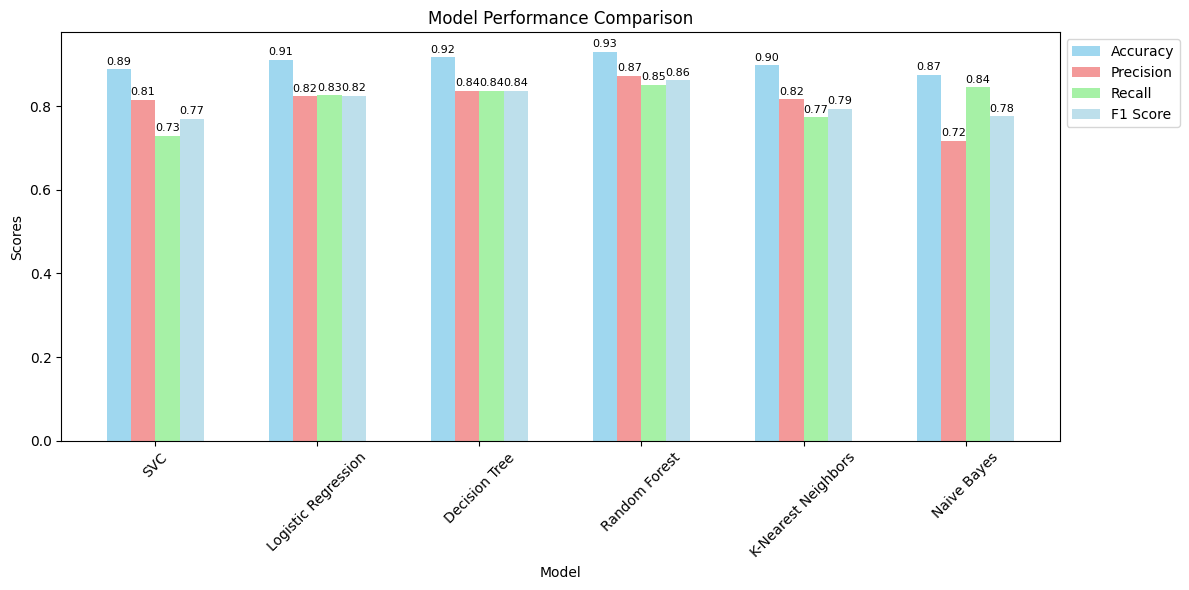

In [63]:
# Below is a code snippet for the bar chart.
bar_width = 0.15
index = np.arange(len(model_names))
opacity = 0.8

plt.figure(figsize=(12, 6))

bar1 = plt.bar(index, accuracy_scores, bar_width, label='Accuracy', alpha=opacity, color='skyblue')
bar2 = plt.bar(index + bar_width, precision_scores, bar_width, label='Precision', alpha=opacity, color='lightcoral')
bar3 = plt.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall', alpha=opacity, color='lightgreen')
bar4 = plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score', alpha=opacity, color='lightblue')  # New bar for F1 score

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + 1.5 * bar_width, model_names, rotation=45)

# Move the legend outside the plot to the upper left
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add value labels precisely on top of each bar with adjusted vertical offset
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate('%.2f' % height,
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 2),  # Adjusted vertical offset for precise positioning
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=8)  # Smaller font size

plt.tight_layout()
plt.show()

Random forest is producing the best results.

## Hyperparameter tuning

__Fine-tuning the parameters of Random forest to further optimise its performance__

In [64]:
# Actual code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in forest
    'max_depth': [None, 10, 20], # Maximum depth of trees
    'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples to be at leaf node
    'max_features': [1, 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False],     # Use bootstrap samples for building trees
}

rfc = RandomForestClassifier(random_state=42)

# Initializing and fitting GridSearchCV with RFC and the parameter grid
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Getting the model with the best hyperparameters
best_rfc = grid_search.best_estimator_

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score: 0.8625163569408588


### Optimised model results

In [65]:
# Now finally fitting and making predictions with the final model.
best_rfc.fit(X_train, y_train)
y_pred = best_rfc.predict(X_test)
            
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
            
# Display results
print(f"Model: Random Forest Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Final classification report:")
print(classification_report(y_test, y_pred))

Model: Random Forest Classifier
Accuracy: 0.93
Precision: 0.88
Recall: 0.85
F1 Score: 0.87
Confusion Matrix:
[[964  45]
 [ 59 341]]
Final classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.88      0.85      0.87       400

    accuracy                           0.93      1409
   macro avg       0.91      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409



The classification report consolidates multiple classification metrics for each class, including precision, recall, and F1 score, along with additional information like accuracy and support. The precision and recall values we printed separately are included in the final classification report. All the values are aligning with each other, indicating consistency in our evaluation metrics.

## Exporting the optimised model

In [66]:
model_filename = 'best-rfc-model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

## Conclusion:

In this analysis, we embarked on a journey to build a robust classification model for a crucial task. The following key steps were undertaken to achieve our goal:

1. **Feature Engineering**: We meticulously prepared our data by performing essential feature engineering steps. This included handling missing values, encoding categorical variables, and scaling features to ensure our models could effectively learn from the data.

2. **Cross-Validation**: To ensure the robustness and generalization of our models, we employed cross-validation techniques. This allowed us to obtain accurate performance scores while mitigating the risk of overfitting.

3. **Model Selection**: We explored a variety of classification models, including Support Vector Classifier (SVC), Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Naive Bayes. This comprehensive evaluation helped us identify the most promising model candidates.

4. **Performance Metrics**: For each model, we rigorously assessed their performance using crucial classification metrics, such as Precision, Recall, F1 Score, and Confusion Matrix. These metrics provided valuable insights into each model's strengths and weaknesses.

5. **Random Forest Classifier**: Among the models tested, the Random Forest Classifier emerged as the top performer. Its ability to handle complex relationships within the data and produce high-quality predictions made it our model of choice.

6. **Hyperparameter Tuning**: To further optimize the Random Forest Classifier, we conducted hyperparameter tuning. This process fine-tuned the model's parameters, enhancing its performance.

7. **Results Visualization**: We visualized the comparative performance of different models using bar charts, making it easy for stakeholders to grasp the differences in accuracy, precision, recall, and F1 Score.

8. **Model Export**: Finally, we exported the optimized Random Forest Classifier, ready for deployment in real-world scenarios.

## Made by: Hrishikesh Reddy Papasani
## Github Profile: https://github.com/Hrishikesh-Papasani